In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from datetime import date
%matplotlib inline

In [57]:
df = pd.read_csv(r"C:\Users\Kanki\Downloads\all_car.csv",sep=",",usecols=[3,4,5,6,7,8,9,10,11,12,13])
df = df.drop(["Sehir","Tarih","Seri"],axis=1)

In [58]:
df.head()

,Marka,Model,Yıl,Km,Renk,Vites,Yakıt,Fiyat
0,Alfa Romeo,1.6 TS Distinctive,2003,200.000,Gümüş Gri,Manuel,Benzin,33.000 TL
1,Alfa Romeo,2.0 TS,1998,330.000,Kırmızı,Manuel,Benzin,23.500 TL
2,Alfa Romeo,1.4 TB MultiAir Distinctive,2011,158.380,Kırmızı,Manuel,Benzin,84.900 TL
3,Alfa Romeo,1.6 TS,2000,305.000,Siyah,Manuel,Benzin,25.500 TL
4,Alfa Romeo,1.4 TB Progression Plus,2011,105.500,Beyaz,Manuel,Benzin,76.500 TL


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99132 entries, 0 to 99131
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Marka   99132 non-null  object
 1   Model   99129 non-null  object
 2   Yıl     99132 non-null  int64 
 3   Km      99130 non-null  object
 4   Renk    99132 non-null  object
 5   Vites   99132 non-null  object
 6   Yakıt   99132 non-null  object
 7   Fiyat   99132 non-null  object
dtypes: int64(1), object(7)
memory usage: 6.1+ MB


In [60]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Yıl,99132.0,2008.73041,7.46706,1970.0,2004.0,2011.0,2015.0,2020.0


In [61]:
df.isnull().sum()

Marka    0
Model    3
Yıl      0
Km       2
Renk     0
Vites    0
Yakıt    0
Fiyat    0
dtype: int64

In [62]:
df.dropna(inplace=True)

In [64]:
marka_model_dict = {}

# Veri üzerinde döngü yaparak markaları ve modelleri sözlüğe ekleyelim
for index, row in df.iterrows():
    marka = row['Marka']
    model = row['Model']
    
    if marka in marka_model_dict:
        if model not in marka_model_dict[marka]:
            marka_model_dict[marka].append(model)
    else:
        marka_model_dict[marka] = [model]

In [9]:
df.isnull().sum()

Marka    0
Model    0
Yıl      0
Km       0
Renk     0
Vites    0
Yakıt    0
Fiyat    0
dtype: int64

In [65]:
with open('marka_model_dict.json', 'w') as f:
    json.dump(marka_model_dict, f)

In [10]:
df["Km"]=df["Km"].str.replace('.', '').astype(int)

In [11]:
df["Fiyat"]=df["Fiyat"].str.replace('.', '')
df["Fiyat"]=df["Fiyat"].str.replace('TL', '')
df["Fiyat"]=df["Fiyat"].str.replace(',', '.').astype(float)

In [12]:
current_date = date.today()
current_year = current_date.year

In [13]:
df["Yaş"] = current_year - df["Yıl"]

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99127 entries, 0 to 99131
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Marka   99127 non-null  object 
 1   Model   99127 non-null  object 
 2   Yıl     99127 non-null  int64  
 3   Km      99127 non-null  int32  
 4   Renk    99127 non-null  object 
 5   Vites   99127 non-null  object 
 6   Yakıt   99127 non-null  object 
 7   Fiyat   99127 non-null  float64
 8   Yaş     99127 non-null  int64  
dtypes: float64(1), int32(1), int64(2), object(5)
memory usage: 7.2+ MB


In [15]:
df.head()

,Marka,Model,Yıl,Km,Renk,Vites,Yakıt,Fiyat,Yaş
0,Alfa Romeo,1.6 TS Distinctive,2003,200000,Gümüş Gri,Manuel,Benzin,33000.0,21
1,Alfa Romeo,2.0 TS,1998,330000,Kırmızı,Manuel,Benzin,23500.0,26
2,Alfa Romeo,1.4 TB MultiAir Distinctive,2011,158380,Kırmızı,Manuel,Benzin,84900.0,13
3,Alfa Romeo,1.6 TS,2000,305000,Siyah,Manuel,Benzin,25500.0,24
4,Alfa Romeo,1.4 TB Progression Plus,2011,105500,Beyaz,Manuel,Benzin,76500.0,13


In [16]:
df = df[["Marka","Model","Yıl","Km","Renk","Vites","Yakıt","Yaş","Fiyat"]]

<Axes: xlabel='Fiyat'>

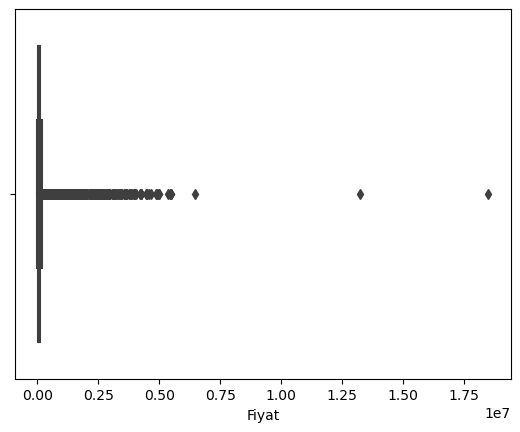

In [17]:
sns.boxplot(x=df["Fiyat"])

In [18]:
df_fiyat = df["Fiyat"]
Q1 = df_fiyat.quantile(0.25)
Q3 = df_fiyat.quantile(0.75)
IQR = Q3 - Q1
alt_sinir = Q1- 1.5*IQR
ust_sinir = Q3 + 1.5*IQR
df = df[(df['Fiyat'] >= alt_sinir) & (df['Fiyat'] <= ust_sinir)]

In [19]:
df_km = df["Km"]
Q1 = df_km.quantile(0.25)
Q3 = df_km.quantile(0.75)
IQR = Q3 - Q1
alt_sinir = Q1- 1.5*IQR
ust_sinir = Q3 + 1.5*IQR
df = df[(df['Km'] >= alt_sinir) & (df['Km'] <= ust_sinir)]

<Axes: xlabel='Fiyat'>

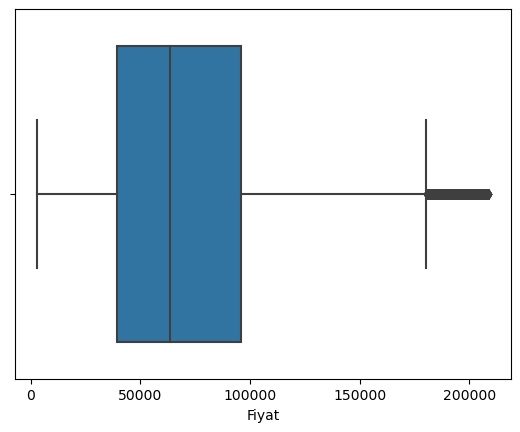

In [20]:
sns.boxplot(x=df["Fiyat"])

Text(0.5, 1.0, 'Vites ve Yakıt Değişkenlerinin Fiyat ile İlişkisi')

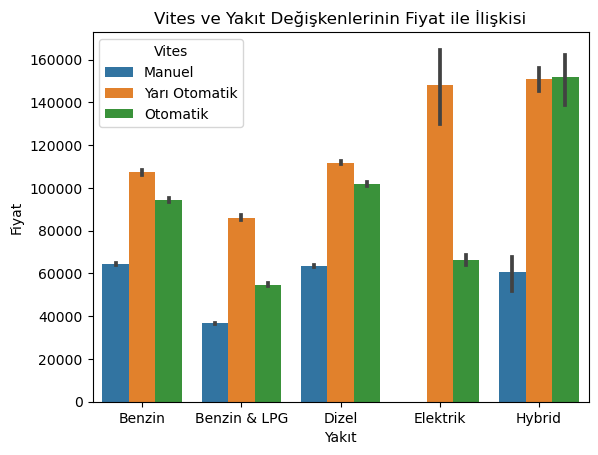

In [21]:
sns.barplot(y="Fiyat",x="Yakıt",hue="Vites",data=df)
plt.title("Vites ve Yakıt Değişkenlerinin Fiyat ile İlişkisi")

C:\Users\Kanki\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


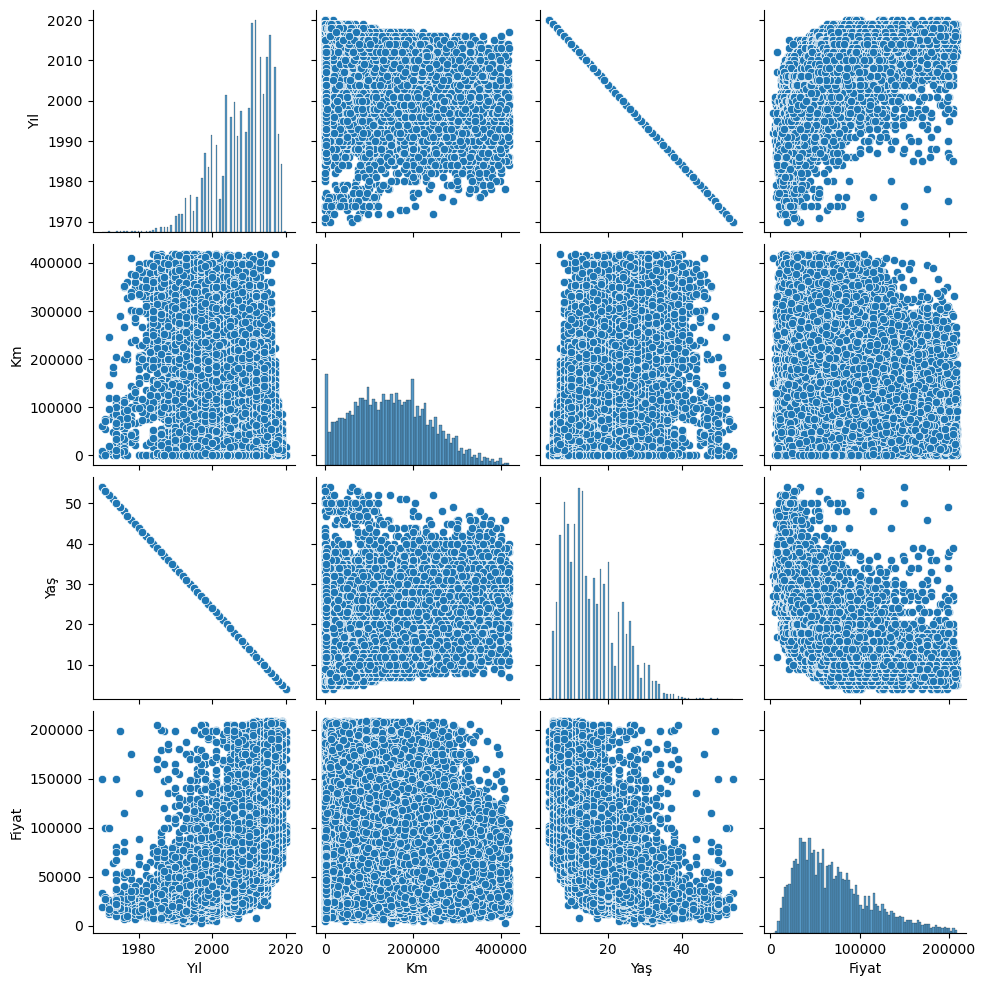

In [22]:
sns.pairplot(df)

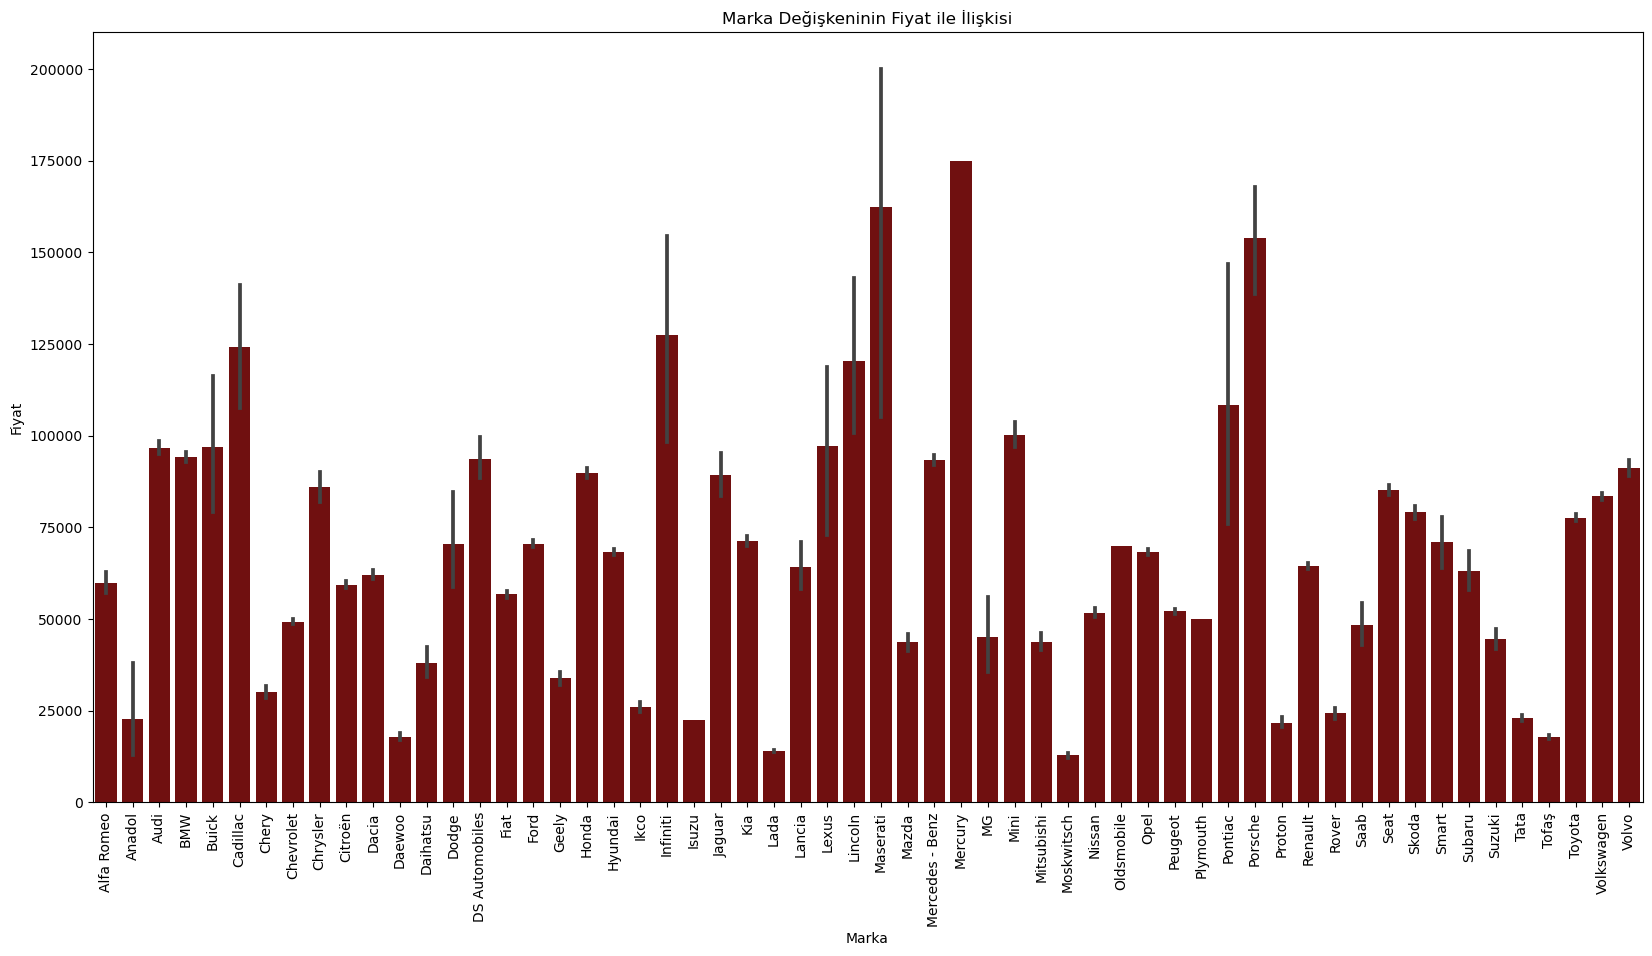

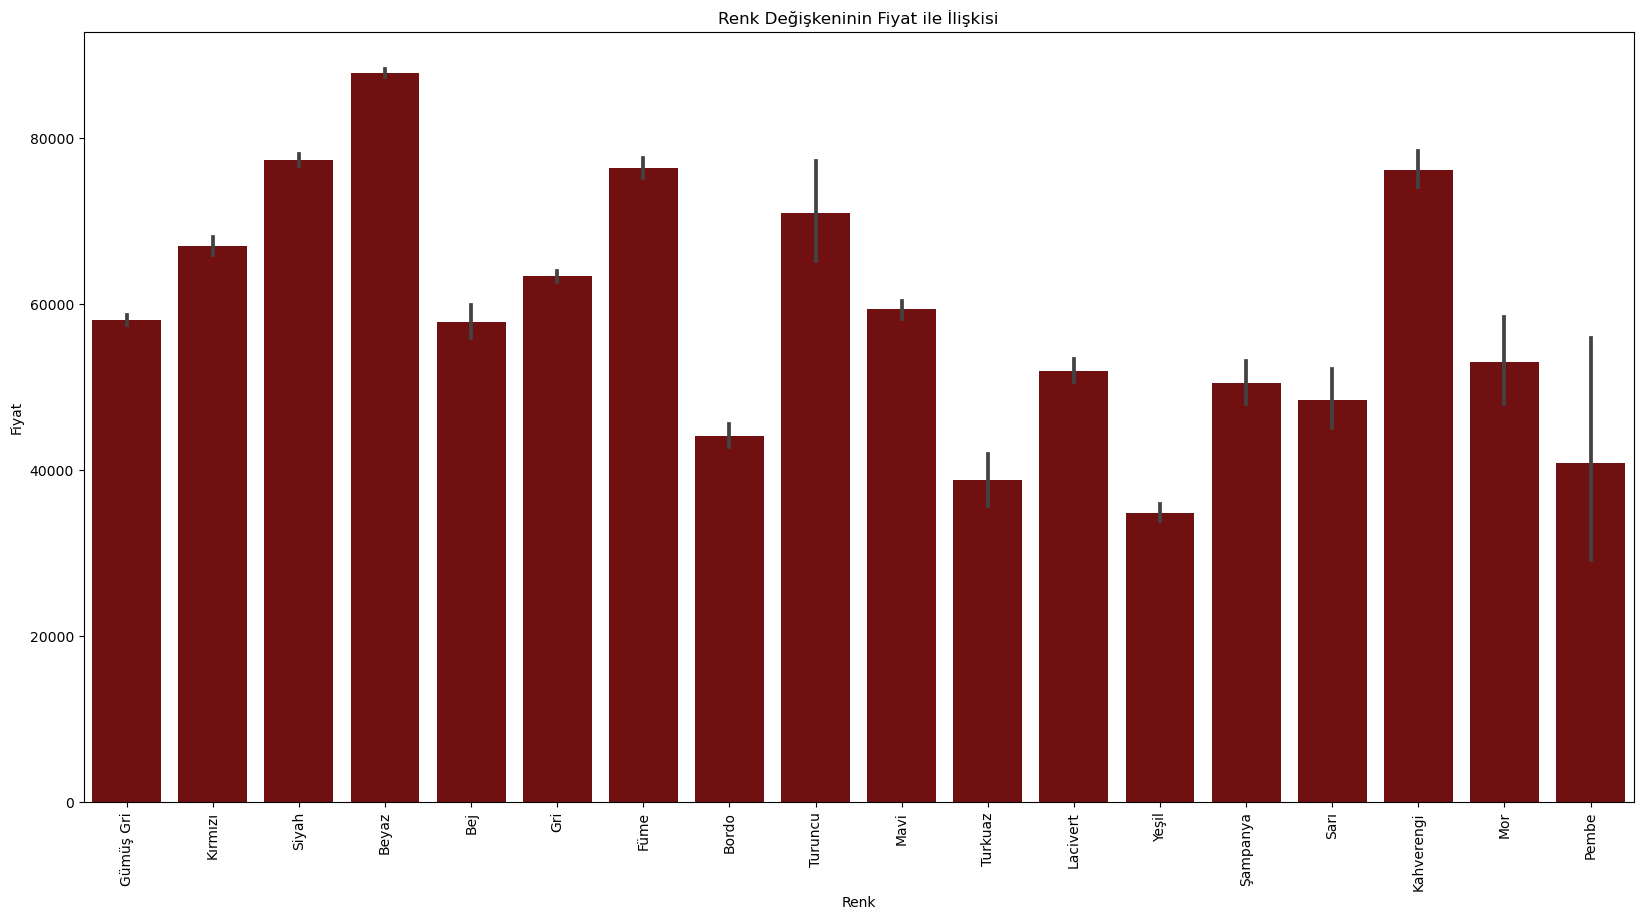

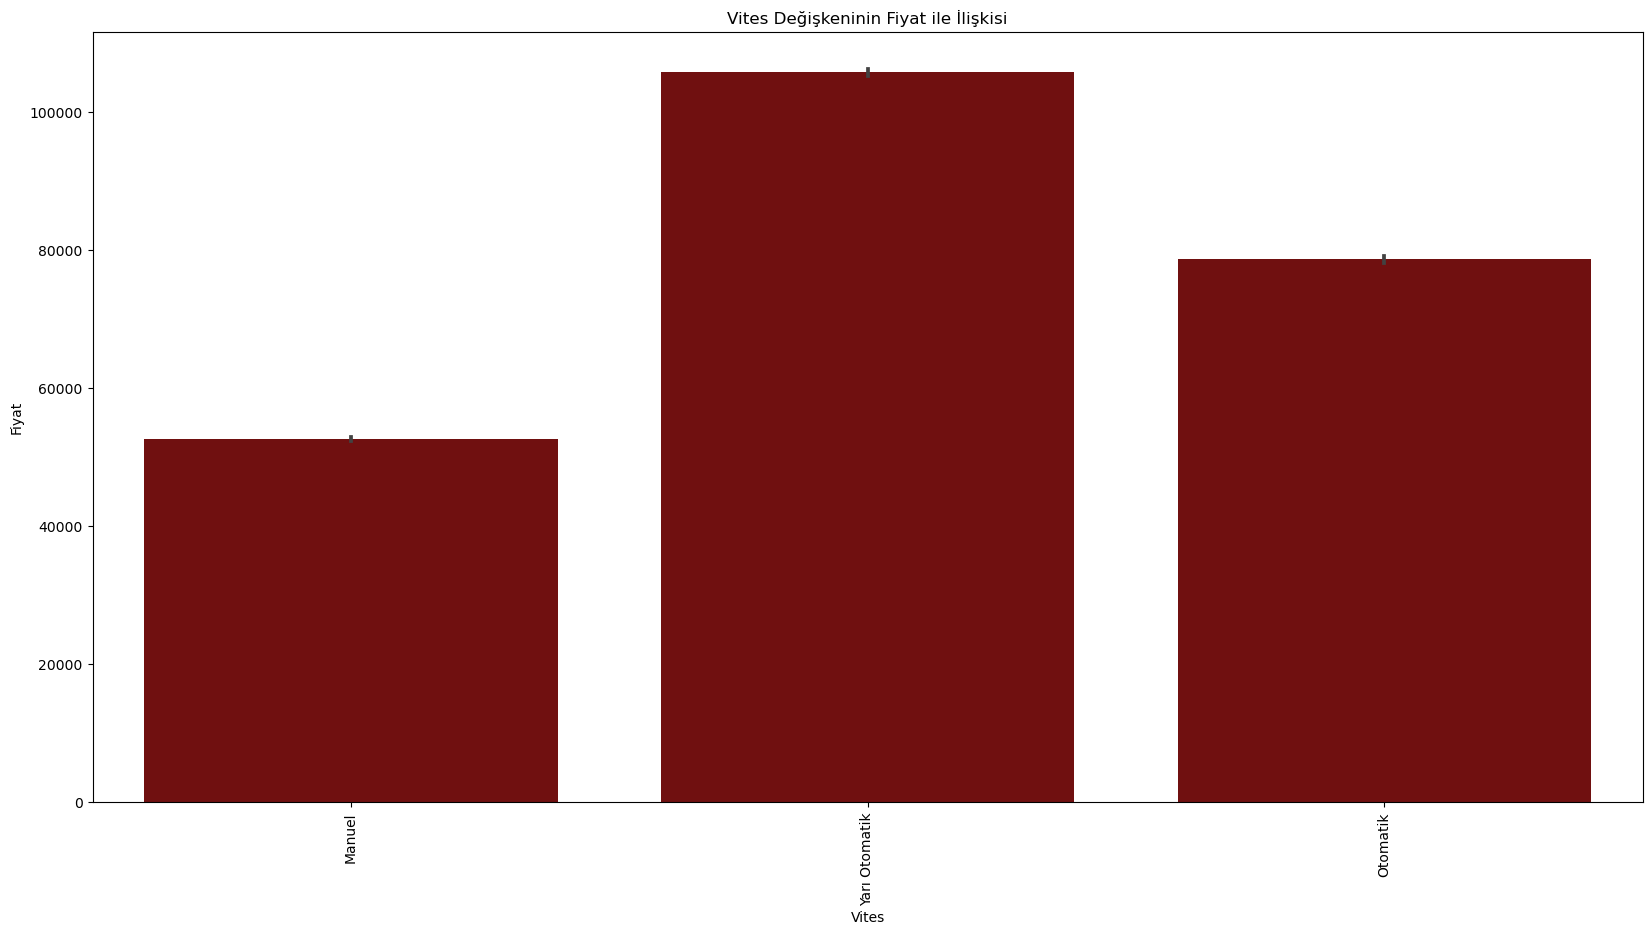

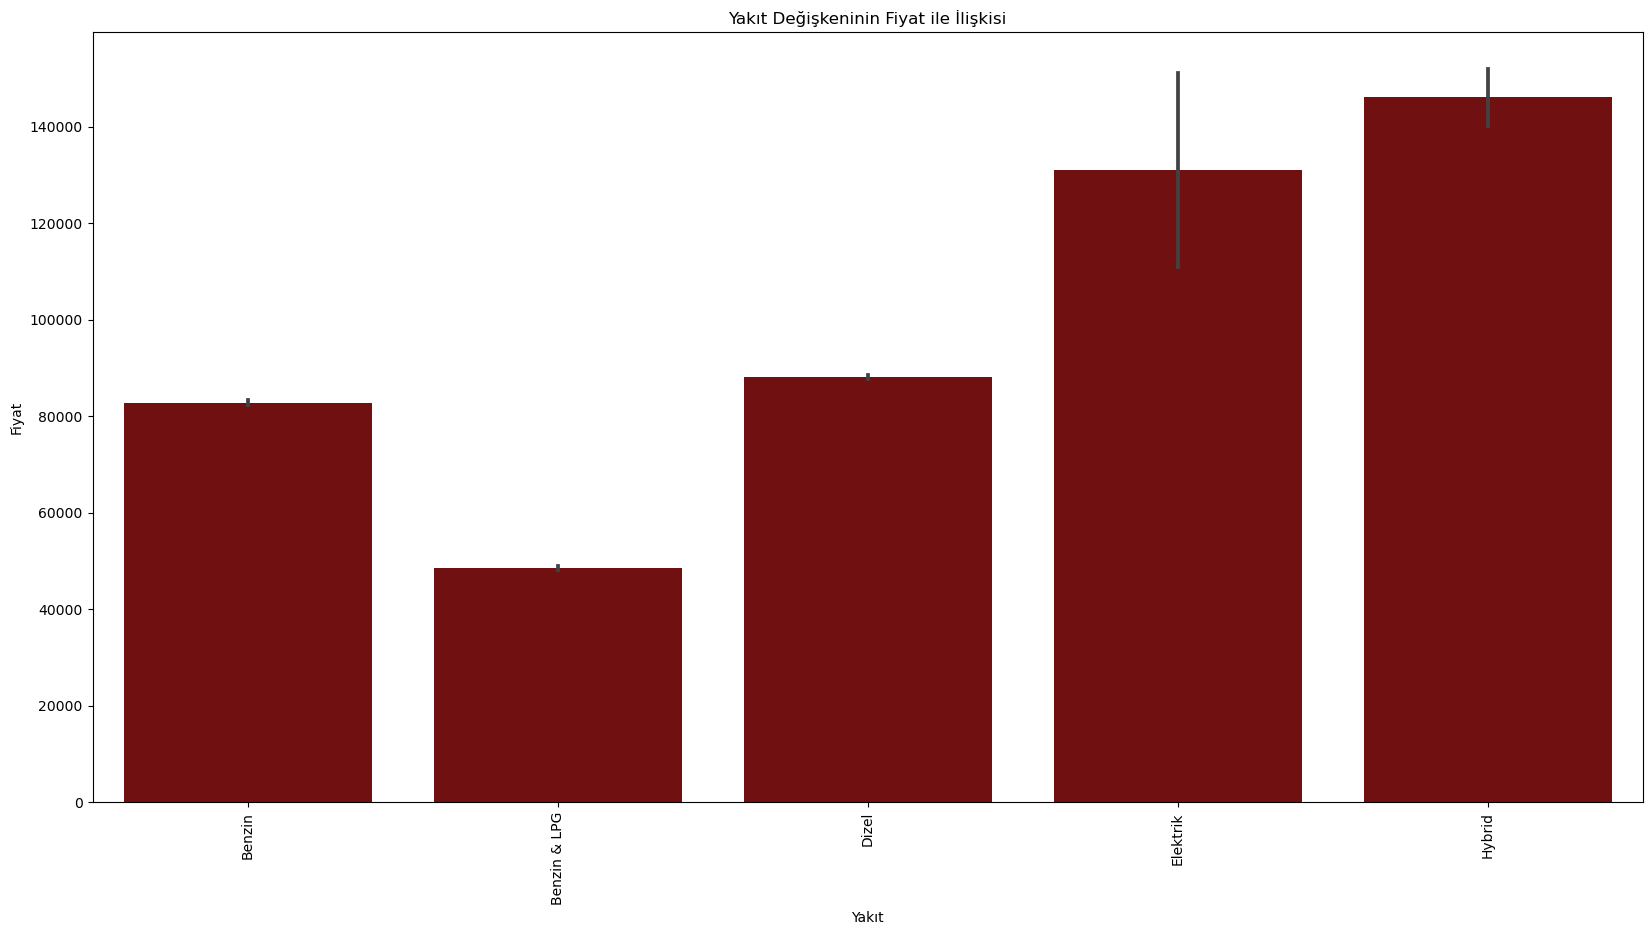

In [23]:
bagimsiz_degiskenler = ["Marka","Renk","Vites","Yakıt"]
for i in bagimsiz_degiskenler:
  plt.figure(figsize=(20,10))
  sns.barplot(x=i,y="Fiyat",color="maroon",data=df)
  plt.title(f'{i} Değişkeninin Fiyat ile İlişkisi')
  plt.xticks(rotation=90)
  plt.show()

In [24]:
df = df.drop(["Yıl"],axis=1)

In [25]:
df.head()

,Marka,Model,Km,Renk,Vites,Yakıt,Yaş,Fiyat
0,Alfa Romeo,1.6 TS Distinctive,200000,Gümüş Gri,Manuel,Benzin,21,33000.0
1,Alfa Romeo,2.0 TS,330000,Kırmızı,Manuel,Benzin,26,23500.0
2,Alfa Romeo,1.4 TB MultiAir Distinctive,158380,Kırmızı,Manuel,Benzin,13,84900.0
3,Alfa Romeo,1.6 TS,305000,Siyah,Manuel,Benzin,24,25500.0
4,Alfa Romeo,1.4 TB Progression Plus,105500,Beyaz,Manuel,Benzin,13,76500.0


In [26]:
df_new = pd.get_dummies(df, columns= ['Renk', 'Vites', 'Yakıt'],dtype=int)

In [27]:
brand_mean_price = df.groupby('Marka')['Fiyat'].mean().to_dict()
model_mean_price = df.groupby('Model')['Fiyat'].mean().to_dict()

In [28]:
df_new['Brand_Encoded'] = df['Marka'].map(brand_mean_price)
df_new['Model_Encoded'] = df['Model'].map(model_mean_price)

In [29]:
df_new

,Marka,Model,Km,Yaş,Fiyat,Renk_Bej,Renk_Beyaz,Renk_Bordo,Renk_Füme,Renk_Gri,...,Vites_Manuel,Vites_Otomatik,Vites_Yarı Otomatik,Yakıt_Benzin,Yakıt_Benzin & LPG,Yakıt_Dizel,Yakıt_Elektrik,Yakıt_Hybrid,Brand_Encoded,Model_Encoded
0,Alfa Romeo,1.6 TS Distinctive,200000,21,33000.0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,59896.374781,36172.153226
1,Alfa Romeo,2.0 TS,330000,26,23500.0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,59896.374781,29937.037037
2,Alfa Romeo,1.4 TB MultiAir Distinctive,158380,13,84900.0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,59896.374781,98938.613636
3,Alfa Romeo,1.6 TS,305000,24,25500.0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,59896.374781,31712.096774
4,Alfa Romeo,1.4 TB Progression Plus,105500,13,76500.0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,59896.374781,75178.571429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99119,Volvo,2.4 D5 Premium,202000,14,122000.0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,91120.291117,97436.842105
99121,Volvo,1.6 D Premium,156470,12,115000.0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,91120.291117,117527.729345
99122,Volvo,2.4 D5 Premium,211000,14,85000.0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,91120.291117,97436.842105
99127,Volvo,2.4 D5 VIP,397500,14,91000.0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,91120.291117,84115.000000


In [30]:
X = df_new.drop(["Fiyat","Marka","Model"], axis=1)
y = df_new["Fiyat"]

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                   random_state=82)

In [38]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [39]:
from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Mean Squared Error (MSE): {mse}')
print(f'RMSE: {rmse}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 207949099.0967924
RMSE: 14420.44032256964
R-squared (R2): 0.8823458895879173


In [41]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
import xgboost
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
models = {
    'ElasticNet': ElasticNet(),
    'RandomForest': RandomForestRegressor(),
    'XGBoost': XGBRegressor(),
    'CatBoost': CatBoostRegressor(verbose=0)
}

In [36]:
results_mse = {}
results_r2 = {}

for model_name, model in models.items():
    # Modeli eğitelim
    model.fit(X_train, y_train)

    # Test seti üzerinde tahmin yapalım
    y_pred = model.predict(X_test)

    # Hata hesaplayalım
    mse = mean_squared_error(y_test, y_pred)
    results_mse[model_name] = mse

    # R2 değerini hesaplayalım
    r2 = r2_score(y_test, y_pred)
    results_r2[model_name] = r2

# En düşük MSE'ye sahip olan modeli bulalım
best_model_mse = min(results_mse, key=results_mse.get)
print(f'En iyi model (en düşük MSE): {best_model_mse}')
print(f'Test Hatası (MSE): {results_mse[best_model_mse]}')

# En yüksek R2'ye sahip olan modeli bulalım
best_model_r2 = max(results_r2, key=results_r2.get)
print(f'En iyi model (en yüksek R2): {best_model_r2}')
print(f'Test R2 değeri: {results_r2[best_model_r2]}')

En iyi model (en düşük MSE): XGBoost
Test Hatası (MSE): 103934198.37945901
En iyi model (en yüksek R2): XGBoost
Test R2 değeri: 0.9411957748081593


In [42]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
pred = rf.predict(X_test)

In [43]:
r2 = r2_score(y_test, pred)
r2

0.93945109395176

In [31]:
import pickle as pk

In [45]:
pk.dump(rf, open("CarPrediction_Model.pkl", "wb"))

In [32]:
pd.set_option('display.max_columns', None)

In [33]:
X.columns

Index(['Km', 'Yaş', 'Renk_Bej', 'Renk_Beyaz', 'Renk_Bordo', 'Renk_Füme',
       'Renk_Gri', 'Renk_Gümüş Gri', 'Renk_Kahverengi', 'Renk_Kırmızı',
       'Renk_Lacivert', 'Renk_Mavi', 'Renk_Mor', 'Renk_Pembe', 'Renk_Sarı',
       'Renk_Siyah', 'Renk_Turkuaz', 'Renk_Turuncu', 'Renk_Yeşil',
       'Renk_Şampanya', 'Vites_Manuel', 'Vites_Otomatik',
       'Vites_Yarı Otomatik', 'Yakıt_Benzin', 'Yakıt_Benzin & LPG',
       'Yakıt_Dizel', 'Yakıt_Elektrik', 'Yakıt_Hybrid', 'Brand_Encoded',
       'Model_Encoded'],
      dtype='object')

In [51]:
import pickle
model_path ="CarPrediction_Model.pkl"
with open(model_path, "rb") as file:
    car_price_model = pickle.load(file)

In [52]:
required_columns = [
    'Marka', 'Model', 'Km', 'Yaş', 
    'Renk_Bej','Renk_Beyaz', 'Renk_Bordo', 'Renk_Füme', 'Renk_Gri', 'Renk_Gümüş Gri', 'Renk_Kahverengi', 'Renk_Kırmızı','Renk_Lacivert' ,'Renk_Mavi','Renk_Mor', 'Renk_Pembe', 'Renk_Sarı', 'Renk_Siyah','Renk_Turkuaz', 'Renk_Turuncu', 'Renk_Yeşil',
    'Renk_Şampanya',
    'Vites_Manuel','Vites_Otomatik', 'Vites_Yarı Otomatik',
    'Yakıt_Benzin','Yakıt_Benzin & LPG','Yakıt_Dizel', 'Yakıt_Elektrik', 'Yakıt_Hybrid',
    'Fiyat'
]

In [53]:
test_features = {
    'Marka' : ['Alfa Romeo','Dacia','Fiat','Audi','Peugeot','Hyundai'],
    'Model' : ['1.6 TS Distinctive','1.5 dCi Stepway','1.2 EL','A3 Sportback 1.6 TDI','1.4 Comfort','1.4 CRDi Team'],
    'Km' : ['200000','30000','140000','125000','110000','190000'],
    'Renk' : ['Gümüş Gri','Beyaz','Gümüş Gri','Beyaz','Gümüş Gri','Siyah'],
    'Yaş' : ['21','6','19','12','15','13'],
    'Vites': ['Manuel','Manuel','Manuel','Yarı Otomatik','Manuel','Manuel'],
    'Yakıt': ['Benzin','Dizel','Benzin','Dizel','Benzin','Dizel']
    }
new_data = []
for i in range(len(test_features['Marka'])):
    car = {
        'Marka': test_features['Marka'][i],
        'Model': test_features['Model'][i],
        'Km': test_features['Km'][i],
        'Renk': test_features['Renk'][i],
        'Yaş': test_features['Yaş'][i],
        'Vites': test_features['Vites'][i],
        'Yakıt': test_features['Yakıt'][i]
    }
    new_data.append(car)
test_df = pd.DataFrame(new_data)
test_df

,Marka,Model,Km,Renk,Yaş,Vites,Yakıt
0,Alfa Romeo,1.6 TS Distinctive,200000,Gümüş Gri,21,Manuel,Benzin
1,Dacia,1.5 dCi Stepway,30000,Beyaz,6,Manuel,Dizel
2,Fiat,1.2 EL,140000,Gümüş Gri,19,Manuel,Benzin
3,Audi,A3 Sportback 1.6 TDI,125000,Beyaz,12,Yarı Otomatik,Dizel
4,Peugeot,1.4 Comfort,110000,Gümüş Gri,15,Manuel,Benzin
5,Hyundai,1.4 CRDi Team,190000,Siyah,13,Manuel,Dizel


In [54]:
test_df = pd.get_dummies(test_df, columns= ['Renk', 'Vites', 'Yakıt'],drop_first=True,dtype=int)

In [55]:
for col in required_columns:
    if col not in test_df.columns:
        test_df[col] = 0

In [56]:
test_df

,Marka,Model,Km,Yaş,Renk_Gümüş Gri,Renk_Siyah,Vites_Yarı Otomatik,Yakıt_Dizel,Renk_Bej,Renk_Beyaz,Renk_Bordo,Renk_Füme,Renk_Gri,Renk_Kahverengi,Renk_Kırmızı,Renk_Lacivert,Renk_Mavi,Renk_Mor,Renk_Pembe,Renk_Sarı,Renk_Turkuaz,Renk_Turuncu,Renk_Yeşil,Renk_Şampanya,Vites_Manuel,Vites_Otomatik,Yakıt_Benzin,Yakıt_Benzin & LPG,Yakıt_Elektrik,Yakıt_Hybrid,Fiyat
0,Alfa Romeo,1.6 TS Distinctive,200000,21,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Dacia,1.5 dCi Stepway,30000,6,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fiat,1.2 EL,140000,19,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Audi,A3 Sportback 1.6 TDI,125000,12,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Peugeot,1.4 Comfort,110000,15,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Hyundai,1.4 CRDi Team,190000,13,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [57]:
test_df = test_df[required_columns]

In [58]:
test_df

,Marka,Model,Km,Yaş,Renk_Bej,Renk_Beyaz,Renk_Bordo,Renk_Füme,Renk_Gri,Renk_Gümüş Gri,Renk_Kahverengi,Renk_Kırmızı,Renk_Lacivert,Renk_Mavi,Renk_Mor,Renk_Pembe,Renk_Sarı,Renk_Siyah,Renk_Turkuaz,Renk_Turuncu,Renk_Yeşil,Renk_Şampanya,Vites_Manuel,Vites_Otomatik,Vites_Yarı Otomatik,Yakıt_Benzin,Yakıt_Benzin & LPG,Yakıt_Dizel,Yakıt_Elektrik,Yakıt_Hybrid,Fiyat
0,Alfa Romeo,1.6 TS Distinctive,200000,21,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Dacia,1.5 dCi Stepway,30000,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,Fiat,1.2 EL,140000,19,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Audi,A3 Sportback 1.6 TDI,125000,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4,Peugeot,1.4 Comfort,110000,15,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Hyundai,1.4 CRDi Team,190000,13,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [59]:
new_data_encoded = []
for car in new_data:
    encoded = {
        'Brand_Encoded': brand_mean_price.get(car['Marka'], 0),
        'Model_Encoded': model_mean_price.get(car['Model'], 0)
    }
    new_data_encoded.append(encoded)
test2_df = pd.DataFrame(new_data_encoded)
test_df = pd.concat([test_df,test2_df], axis=1, join='inner')

In [60]:
test_df = test_df.drop(["Fiyat","Marka","Model"],axis=1)

In [61]:
test_df

,Km,Yaş,Renk_Bej,Renk_Beyaz,Renk_Bordo,Renk_Füme,Renk_Gri,Renk_Gümüş Gri,Renk_Kahverengi,Renk_Kırmızı,Renk_Lacivert,Renk_Mavi,Renk_Mor,Renk_Pembe,Renk_Sarı,Renk_Siyah,Renk_Turkuaz,Renk_Turuncu,Renk_Yeşil,Renk_Şampanya,Vites_Manuel,Vites_Otomatik,Vites_Yarı Otomatik,Yakıt_Benzin,Yakıt_Benzin & LPG,Yakıt_Dizel,Yakıt_Elektrik,Yakıt_Hybrid,Brand_Encoded,Model_Encoded
0,200000,21,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,59896.374781,36172.153226
1,30000,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,62086.734107,77961.377704
2,140000,19,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,56701.344698,27646.146789
3,125000,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,96733.965188,136170.144654
4,110000,15,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,52025.563607,39554.158095
5,190000,13,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,68203.137826,47226.315789


In [62]:
predicted_price = car_price_model.predict(test_df)
print(predicted_price)

[ 36595.          98014.99        37076.5        121038.5
  48399.33333333  49987.49      ]


In [42]:
import json
with open('brand_mean_price.json', 'w') as f:
    json.dump(brand_mean_price, f)

with open('model_mean_price.json', 'w') as f:
    json.dump(model_mean_price, f)